## Before running these commands:

Please note that this jupyter notebook is not self-contained, and that you need to load an environment and some modules for it to be able to run on the HPC of DTU. We do not recommend to run this locally, as the different models are run in different Python versions, with is non-trivial to do locally, but very easy to do in an HPC by loading and unloading modules.

Also, this script is just proof of concept that the models run, and not actually where we trained the models to get our results, since the use of Jupyter Notebooks is highly discouraged by the HPC Team at DTU and our supervisor discouraged us from using it.

Lastly, the data needs to be unzipped, after being cloned from the repository (tar -xf P12Data_1.tar.gz, and so on for all the splits)

## Baseline models

### Generate your own environment

- module load python3/3.9.19
- module load cuda/11.8
- module load cudnn/v8.8.0-prod-cuda-11.X

```
python -m venv ./venv
source ./venv/bin/activate
pip install -r requirements.txt
pip install torch_scatter --extra-index-url https://data.pyg.org/whl/torch-2.2.0+cu118.html
```

In [1]:
import subprocess

# Function to execute command line commands 
def run_command(command):
    try:
        result = subprocess.run(command, shell=True, check=True, text=True, capture_output=True)
        print("Output:\n", result.stdout)
    except subprocess.CalledProcessError as e:
        print("Error:\n", e.stderr)

In [7]:
# Transformer
command = "python cli.py --output_path=transformer --epochs=1 --batch_size=16 --model_type=transformer --dropout=0.2 --attn_dropout=0.1 --layers=3 --heads=1 --pooling=max --lr=0.0001"
run_command(command)

Output:
 Loading preprocessed datasets from ./processed_datasets
Loaded dataset from ./processed_datasets/physionet2012_1_pos.h5
Loaded dataset from ./processed_datasets/physionet2012_1_neg.h5
Loaded dataset from ./processed_datasets/physionet2012_1_val.h5
Loaded dataset from ./processed_datasets/physionet2012_1_test.h5
# of trainable parameters: 203716
Epoch: 1, Train Loss: 0.560769198905854, Val Loss: 0.5448934435844421
Validation loss decreased (inf --> 0.176933).  Saving model ...
Test Loss: 0.5242860317230225
{'0': {'precision': 0.954248366013072, 'recall': 0.7101167315175098, 'f1-score': 0.8142777467930842, 'support': 1028}, '1': {'precision': 0.31336405529953915, 'recall': 0.7953216374269005, 'f1-score': 0.4495867768595041, 'support': 171}, 'accuracy': 0.7222685571309424, 'macro avg': {'precision': 0.6338062106563056, 'recall': 0.7527191844722052, 'f1-score': 0.6319322618262941, 'support': 1199}, 'weighted avg': {'precision': 0.8628461832507583, 'recall': 0.7222685571309424, 'f1

In [8]:
#Seft
command = 'python cli.py --output_path=seft --model_type=seft --epochs=1 --batch_size=128 --dropout=0.4 --attn_dropout=0.3 --heads=2 --lr=0.01 --seft_dot_prod_dim=512 --seft_n_phi_layers=1 --seft_n_psi_layers=5 --seft_n_rho_layers=2 --seft_phi_dropout=0.3 --seft_phi_width=512 --seft_psi_width=32 --seft_psi_latent_width=128 --seft_latent_width=64 --seft_rho_dropout=0.0 --seft_rho_width=256 --seft_max_timescales=1000 --seft_n_positional_dims=16'
run_command(command)

Output:
 Loading preprocessed datasets from ./processed_datasets
Loaded dataset from ./processed_datasets/physionet2012_1_pos.h5
Loaded dataset from ./processed_datasets/physionet2012_1_neg.h5
Loaded dataset from ./processed_datasets/physionet2012_1_val.h5
Loaded dataset from ./processed_datasets/physionet2012_1_test.h5
# of trainable parameters: 320352
Epoch: 1, Train Loss: 0.7838414027577355, Val Loss: 0.5976042151451111
Validation loss decreased (inf --> 0.229051).  Saving model ...
Test Loss: 0.6006776094436646
{'0': {'precision': 0.9290085679314566, 'recall': 0.7383268482490273, 'f1-score': 0.8227642276422764, 'support': 1028}, '1': {'precision': 0.29581151832460734, 'recall': 0.6608187134502924, 'f1-score': 0.40867992766726946, 'support': 171}, 'accuracy': 0.7272727272727273, 'macro avg': {'precision': 0.6124100431280319, 'recall': 0.6995727808496599, 'f1-score': 0.6157220776547729, 'support': 1199}, 'weighted avg': {'precision': 0.8387027335004547, 'recall': 0.7272727272727273, 

In [9]:
#IP-Nets
command = 'python cli.py --output_path=ip_nets --model_type=ipnets --epochs=1 --batch_size=32 --lr=0.001 --ipnets_imputation_stepsize=1 --ipnets_reconst_fraction=0.75 --recurrent_dropout=0.3 --recurrent_n_units=32'
run_command(command)

Output:
 Loading preprocessed datasets from ./processed_datasets
Loaded dataset from ./processed_datasets/physionet2012_1_pos.h5
Loaded dataset from ./processed_datasets/physionet2012_1_neg.h5
Loaded dataset from ./processed_datasets/physionet2012_1_val.h5
Loaded dataset from ./processed_datasets/physionet2012_1_test.h5
# of trainable parameters: 16448
Epoch: 1, Train Loss: 1.3711308870050642, Val Loss: 0.4954312741756439
Validation loss decreased (inf --> 0.210015).  Saving model ...
Test Loss: 0.4704166352748871
{'0': {'precision': 0.9481743227326266, 'recall': 0.7830739299610895, 'f1-score': 0.8577517314864145, 'support': 1028}, '1': {'precision': 0.3628571428571429, 'recall': 0.7426900584795322, 'f1-score': 0.48752399232245686, 'support': 171}, 'accuracy': 0.7773144286905754, 'macro avg': {'precision': 0.6555157327948847, 'recall': 0.7628819942203109, 'f1-score': 0.6726378619044356, 'support': 1199}, 'weighted avg': {'precision': 0.8646970602149388, 'recall': 0.7773144286905754, 'f

In [10]:
#Grud
command = 'python cli.py --output_path=grud --model_type=grud --epochs=1 --batch_size=32 --lr=0.0001 --recurrent_dropout=0.2 --recurrent_n_units=128'
run_command(command)

Output:
 Loading preprocessed datasets from ./processed_datasets
Loaded dataset from ./processed_datasets/physionet2012_1_pos.h5
Loaded dataset from ./processed_datasets/physionet2012_1_neg.h5
Loaded dataset from ./processed_datasets/physionet2012_1_val.h5
Loaded dataset from ./processed_datasets/physionet2012_1_test.h5
# of trainable parameters: 100812
Epoch: 1, Train Loss: 0.636444986103073, Val Loss: 0.5515128970146179
Validation loss decreased (inf --> 0.233835).  Saving model ...
Test Loss: 0.5340465307235718
{'0': {'precision': 0.9356659142212189, 'recall': 0.806420233463035, 'f1-score': 0.8662486938349008, 'support': 1028}, '1': {'precision': 0.36421725239616615, 'recall': 0.6666666666666666, 'f1-score': 0.4710743801652893, 'support': 171}, 'accuracy': 0.786488740617181, 'macro avg': {'precision': 0.6499415833086926, 'recall': 0.7365434500648509, 'f1-score': 0.668661537000095, 'support': 1199}, 'weighted avg': {'precision': 0.8541665637857861, 'recall': 0.786488740617181, 'f1-sc

## Mamba models

### Generate your own environment (NOTE THE DIFFERENT PYTHON VERSION)

- module load python3/3.10.12
- module load cuda/11.8
- module load cudnn/v8.8.0-prod-cuda-11.X
```
python -m venv ./venv
source ./venv/bin/activate
pip install -r requirementsmamba.txt
```

In [6]:
#EHR Mamba
command = 'python updated_cli_2.py --output_path=./mamba_jupyter --model_type=mamba --epochs=1 --batch_size=4 --dropout=0.1 --lr=0.0001'
run_command(command)

Output:
 Loading preprocessed datasets from ./processed_datasets
Loaded dataset from ./processed_datasets/physionet2012_1_pos.h5
Loaded dataset from ./processed_datasets/physionet2012_1_neg.h5
Loaded dataset from ./processed_datasets/physionet2012_1_val.h5
Loaded dataset from ./processed_datasets/physionet2012_1_test.h5
0
NVIDIA A100-PCIE-40GB
# of trainable parameters: 4290
CrossEntropyLoss
Adam
loss in train:  tensor(0.7036, device='cuda:0', grad_fn=<AddBackward0>)
loss in train:  tensor(0.6467, device='cuda:0', grad_fn=<AddBackward0>)
loss in train:  tensor(0.7000, device='cuda:0', grad_fn=<AddBackward0>)
loss in train:  tensor(0.6089, device='cuda:0', grad_fn=<AddBackward0>)
loss in train:  tensor(0.6876, device='cuda:0', grad_fn=<AddBackward0>)
loss in train:  tensor(0.6995, device='cuda:0', grad_fn=<AddBackward0>)
loss in train:  tensor(0.6959, device='cuda:0', grad_fn=<AddBackward0>)
loss in train:  tensor(0.6502, device='cuda:0', grad_fn=<AddBackward0>)
loss in train:  tensor(0

In [13]:
#Custom mamba
command = 'python models/custom_mamba_hyperparams.py'
run_command(command)

Output:
 Trial 1/1 - Params: {'learning_rate': 0.0005, 'num_bins': 256}
Epoch 1, Train Loss: 0.7474, Val Loss: 0.7189, Val AUROC: 0.5524
Validation loss decreased (inf --> 0.552447).  Saving model ...
Best Hyperparameters: {'learning_rate': 0.0005, 'num_bins': 256}
Test Loss: 0.7023, Test Accuracy: 0.8565, Test AUROC: 0.4785, Test AUPRC: 0.1373



## Plotting

Since we have only trained for one epoch to show proof of concept, the lineplot does not have sufficient data to show actual lines.

In [14]:
required_libraries = ["pandas", "matplotlib", "seaborn", "json"]

for lib in required_libraries:
    try:
        __import__(lib)
    except ImportError:
        print(f"{lib} not found. Installing...")
        %pip install {lib}


import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Apply seaborn settings
sns.set_palette("bright")
sns.set_style("ticks")

print("All libraries successfully imported and ready!")


seaborn not found. Installing...
     |████████████████████████████████| 294 kB 1.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
All libraries successfully imported and ready!


In [15]:
models = ['seft', 'ip_nets', 'grud', 'transformer', 'mamba_jupyter']
splits = ['split_1', 'split_2', 'split_3', 'split_4', 'split_5']
base_path = '/dtu/blackhole/0c/203308/DL_final'
models_2 = ['SEFT', 'IPNets', 'GruD', 'Transformer', 'Odyssey Mamba', 'Custom Mamba']

In [16]:
train_logs = []

for model in models:
    for split in splits:
        train_log_path = os.path.join(base_path, model, split, 'training_log.csv')
        df = pd.read_csv(train_log_path)
        df['model'] = model
        df['split'] = split
        train_logs.append(df)


train_logs_df = pd.concat(train_logs, ignore_index=True)

# Mutate ehr_classification_results to GruD, ehr_transformer to Transformer, ehr_seft to SEFT, ehr_ipnets to IPNets
train_logs_df['model'] = train_logs_df['model'].replace({'grud': 'GruD', 'transformer': 'Transformer', 'seft': 'SEFT', 'ip_nets': 'IPNets', 'mamba_jupyter': 'Odyssey Mamba'})


In [17]:
custom_mamba = pd.read_csv('custom_mamba_last_results.csv')
custom_mamba['model'] = 'Custom Mamba'

# Move all the data in train_loss column to val_loss column, and after set all the values in train_loss to 0
custom_mamba['val_loss'] = custom_mamba['train_loss']
custom_mamba['train_loss'] = 0

custom_mamba

,epoch,train_loss,val_loss,val_roc_auc_score,model,split
0,1,0,0.747352,0.552447,Custom Mamba,split_1


In [18]:
train_logs_df = pd.concat([train_logs_df, custom_mamba], ignore_index=True)

train_logs_df

,epoch,train_loss,val_loss,val_roc_auc_score,model,split
0,1,0.783841,0.597604,0.770949,SEFT,split_1
1,1,0.777992,0.602256,0.740497,SEFT,split_2
2,1,0.821214,0.742058,0.696856,SEFT,split_3
3,1,0.804911,0.606877,0.618002,SEFT,split_4
4,1,0.793950,0.821332,0.747704,SEFT,split_5
5,1,1.371131,0.495431,0.789985,IPNets,split_1
6,1,1.345416,0.474131,0.842945,IPNets,split_2
7,1,1.385388,0.532147,0.842422,IPNets,split_3
8,1,1.330972,0.532567,0.818653,IPNets,split_4
9,1,1.371213,0.521305,0.851179,IPNets,split_5


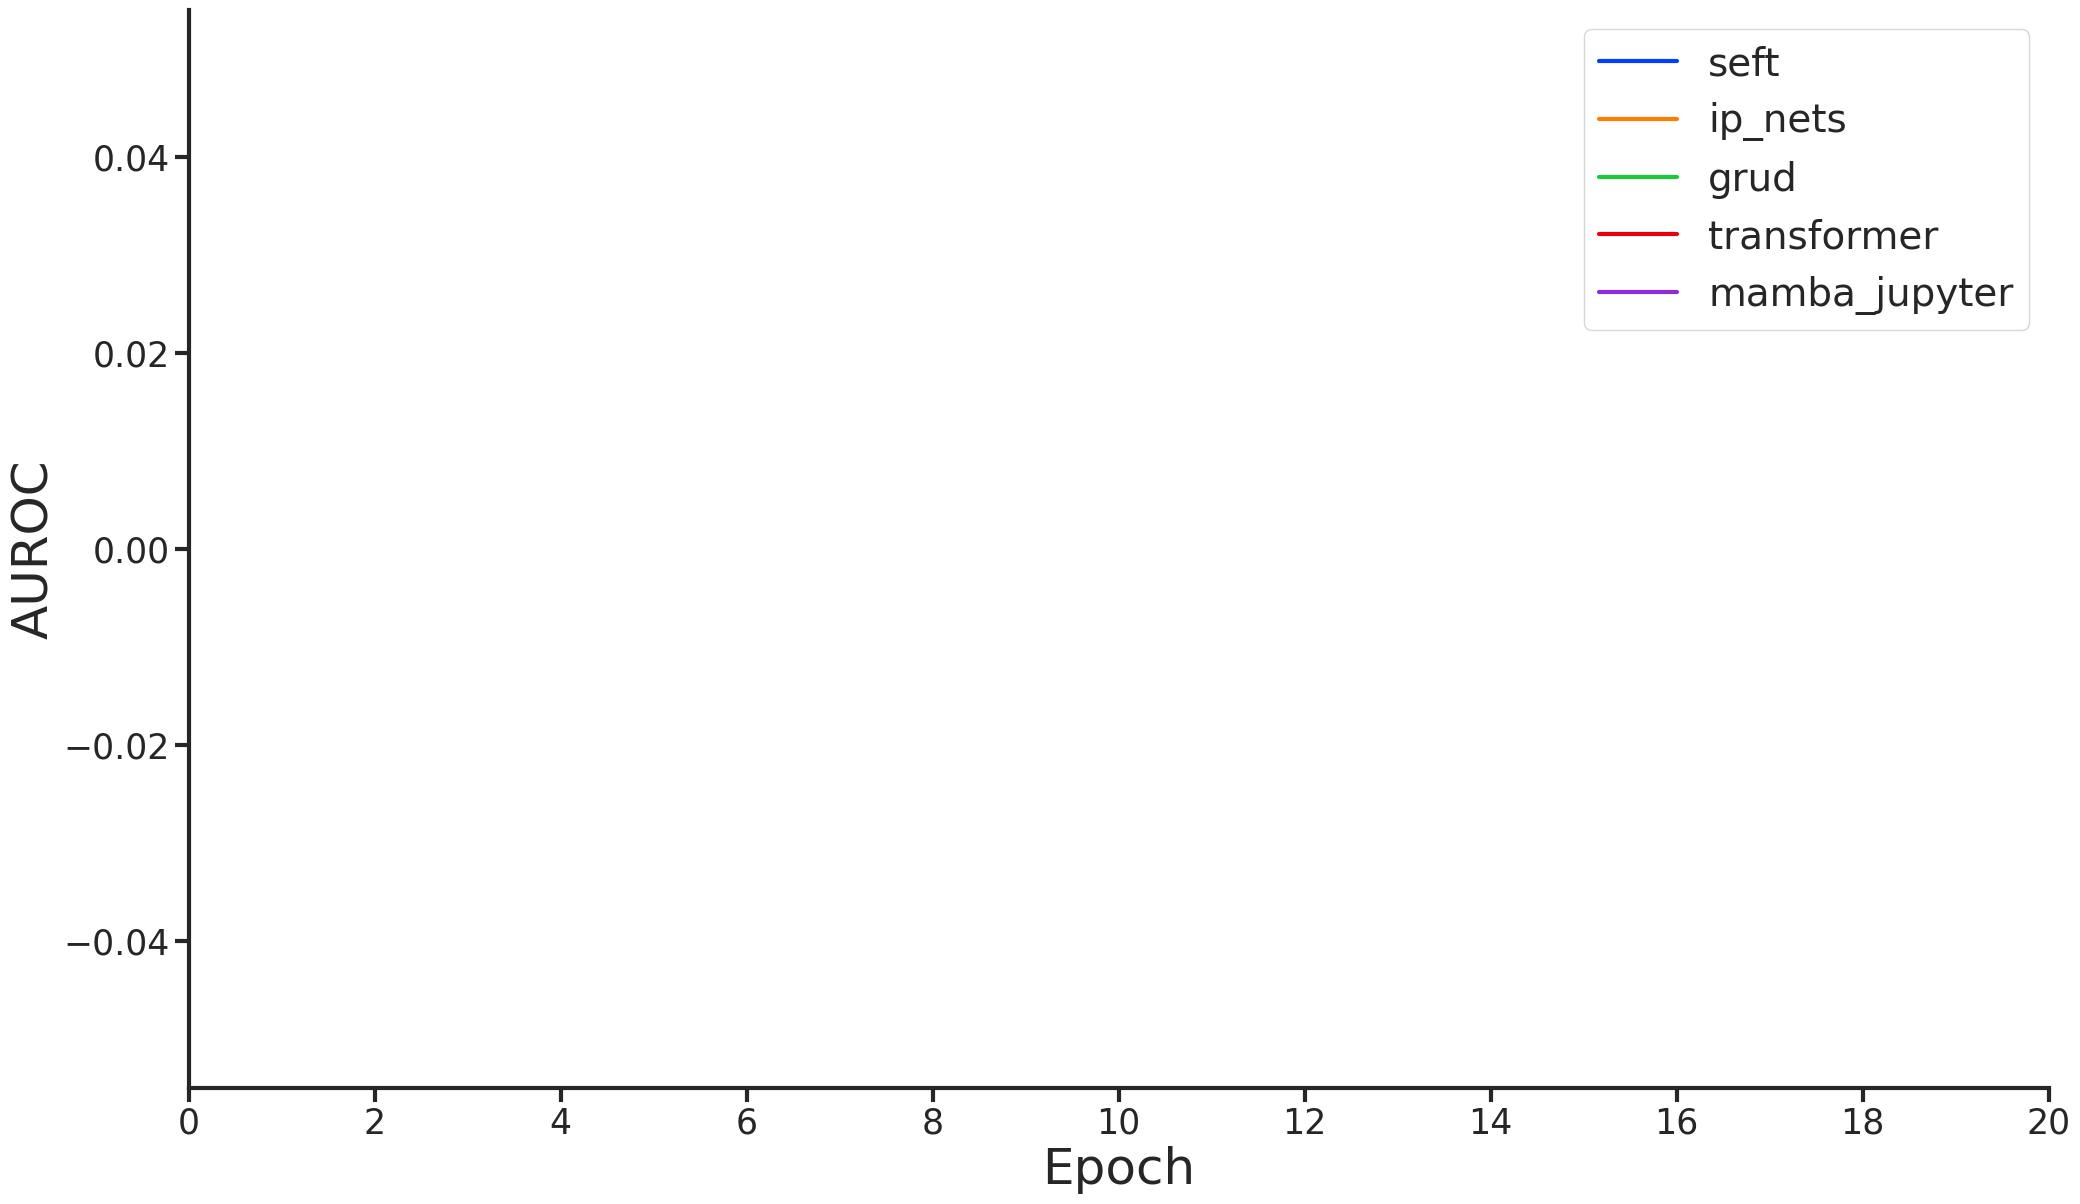

In [20]:
plt.figure(figsize=(24, 14))

for m in models:
    model_data = train_logs_df[(train_logs_df['model'] == m) & (train_logs_df['split'] == 'split_1')]
    sns.lineplot(data=model_data, x='epoch', y='val_roc_auc_score', label=m, linewidth=3)

plt.xlim(0, 20)

plt.xticks(range(0, 21, 2), fontsize=25)


plt.gca().yaxis.set_tick_params(width=3, length=10, labelsize=25)
plt.gca().xaxis.set_tick_params(width=3, length=10, labelsize=25)

sns.despine()
plt.xlabel('Epoch', fontsize=36)
plt.ylabel('AUROC', fontsize=36)
plt.legend(fontsize=28)

plt.gca().spines['left'].set_linewidth(3)
plt.gca().spines['bottom'].set_linewidth(3)

plt.show()


### This is the actual code used for the plotting in the report, which does not work with the minimal runs we have done here for proof of concept

In [ ]:
from matplotlib.ticker import LogLocator

plt.figure(figsize=(24, 14))

for m in models:
    model_data = train_logs_df[(train_logs_df['model'] == m) & (train_logs_df['split'] == 'split_1')]
    sns.lineplot(data=model_data, x='epoch', y='val_roc_auc_score', label=m, linewidth=3)

plt.xlim(0, 20)
plt.yscale('log')

log_locator = LogLocator(base=10.0, subs=None, numticks=10)
plt.gca().yaxis.set_major_locator(log_locator)

plt.xticks(range(0, 21, 2))

plt.gca().yaxis.set_tick_params(width=3, length=10, labelsize=25)
plt.gca().xaxis.set_tick_params(width=3, length=10, labelsize=25)

sns.despine()
plt.xlabel('Epoch', fontsize=36)
plt.ylabel('AUROC', fontsize=36)
plt.legend(fontsize=28)

plt.gca().spines['left'].set_linewidth(3)
plt.gca().spines['bottom'].set_linewidth(3)

plt.show()